In [20]:
import importlib
import gui
import people
import astar
import main_functions
importlib.reload(gui)
importlib.reload(people)
importlib.reload(astar)
importlib.reload(main_functions)
from gui import GUI
from people import PeopleList
from main_functions import one_simulation, one_simulation_for_heatmap, plot_with_ci, plot_with_two_ci_bar, plot_heatmap
import matplotlib.pyplot as plt
import numpy as np

## 1. Find an Optimal Obstacle (No Group)

In [2]:
# Default Parameter Setting
r_1 = 0.6 # ratio of 1-ped group
r_2 = 0.35 # ratio of 2-ped group
r_3 = 0.05 # ratio of 3-ped group
N = 15*9 # Total pedestrians
barrier_set = [(0, 0), (27, 17), (26, 8), (22, 7), (23, 10)]
delta_time = 0.005
seed = 41
percent_threshold = 80
A_p=2000
A_o=2000
B=-0.08
beta1=1
beta2=3

time,time_perct = one_simulation(barrier_set, percent_threshold, 
                   r_1, r_2, r_3, A_p, A_o, B, beta1, beta2,
                   N, delta_time, seed, gui_display=True)

In [3]:
print(f"Time when {percent_threshold} of people moved out: {time_perct:.3f} seconds")
print(f"Time when 100% of people moved out: {time:.3f} seconds")

Time when 80 of people moved out: 61.920 seconds
Time when 100% of people moved out: 135.190 seconds


### 1.1 No Obstacle

In [4]:
barrier_set_noobs = [(0, 0), (27, 17), (26, 8)]

r_1 = 1 # ratio of 1-ped group
r_2 = 0 # ratio of 2-ped group
r_3 = 0 # ratio of 3-ped group
N = 15*9 # Total pedestrians
delta_time = 0.005
seed = 41
percent_threshold = 80
A_p=998.97
A_o=998.97
B=-0.08
beta1=1
beta2=3

time_list_noobs = []
time_perct_list_noobs = []
for seed in range(20):
    if (seed+1)%5==0:
        print(f"No.{seed+1} Simulation")
    time, time_perct = one_simulation(barrier_set_noobs, percent_threshold, 
                   r_1, r_2, r_3, A_p, A_o, B, beta1, beta2,
                   N, delta_time, seed, gui_display=False)
    time_list_noobs.append(time)
    time_perct_list_noobs.append(time_perct)

print(f"Mean time (all out) for no-obstacle: {np.mean(time_list_noobs):.2f} seconds")
print(f"Std-erro of time (all out) for no-obstacle: {np.std(time_list_noobs):.2f}")
print(f"Mean time ({percent_threshold} out) for no-obstacle: {np.mean(time_perct_list_noobs):.2f} seconds")
print(f"Std-erro of time ({percent_threshold} out) for no-obstacle: {np.std(time_perct_list_noobs):.2f}")

Mean time (all out) for no-obstacle: 26.34 seconds
Std-erro of time (all out) for no-obstacle: 0.00
Mean time (80 out) for no-obstacle: 17.14 seconds
Std-erro of time (80 out) for no-obstacle: 0.00


### 1.2 Horizontal Panel

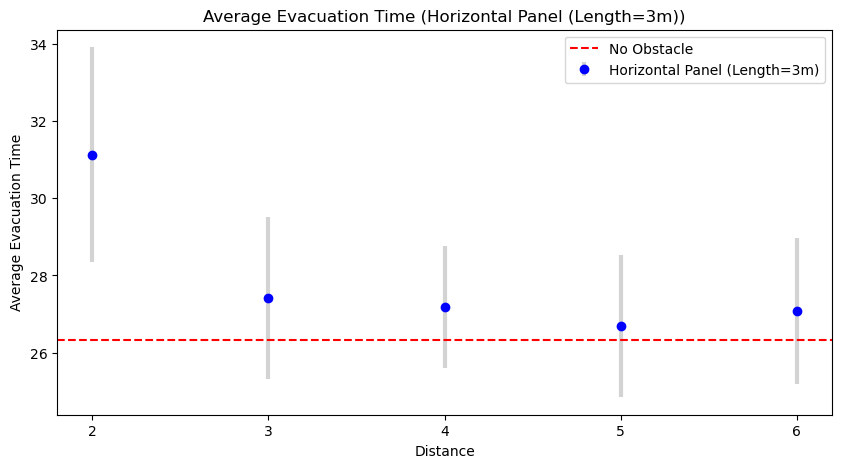

In [7]:
# length=3m
time_list_d = []
for d in range(2,7):
    print(f"No.{d-1} Simulation(d={d})")
    time_list = []
    for seed in range(20):
        barrier_set = barrier_set_noobs + [(26-d-1,7),(26-d,10)]
        time, time_perct = one_simulation(barrier_set, percent_threshold, 
                    r_1, r_2, r_3, A_p, A_o, B, beta1, beta2,
                    N, delta_time, seed, gui_display=False)
        time_list.append(time)
    time_list_d.append(time_list)

plot_with_ci(time_list_d,range(2,7), obstacle_type='Horizontal Panel (Length=3m)', value_noobs=np.mean(time_list_noobs))

### 1.3 Vertical Panel

No.1 Simulation(d=2)
No.2 Simulation(d=3)
No.3 Simulation(d=4)
No.4 Simulation(d=5)
No.5 Simulation(d=6)


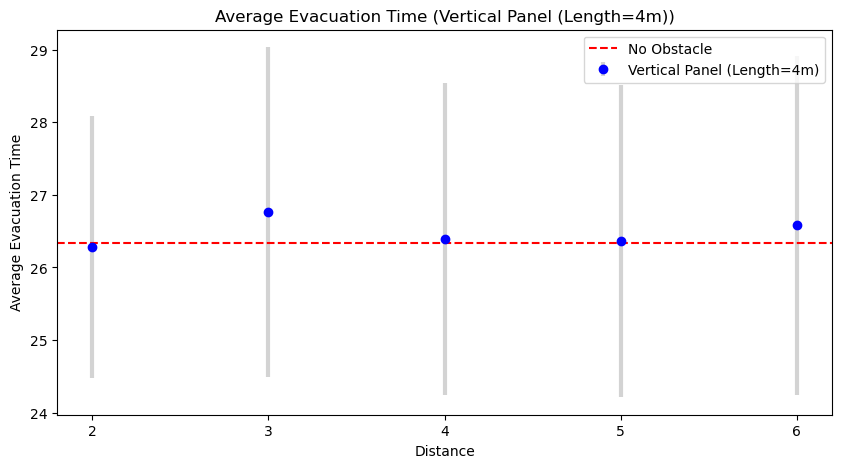

In [8]:
# length=4m
time_list_d = []
for d in range(2, 7):
    print(f"No.{d-1} Simulation(d={d})")
    time_list_temp = []
    for seed in range(20):
        barrier_set = barrier_set_noobs + [(26-d-4, 8), (26-d, 9)]
        time, time_perct = one_simulation(barrier_set, percent_threshold, 
                                          r_1, r_2, r_3, A_p, A_o, B, beta1, beta2,
                                          N, delta_time, seed, gui_display=False)
        time_list_temp.append(time)
    time_list_d.append(time_list_temp)
    
plot_with_ci(time_list_d,range(2,7), obstacle_type='Vertical Panel (Length=4m)', value_noobs=np.mean(time_list_noobs))

No.1 Simulation(d=2)
No.2 Simulation(d=3)
No.3 Simulation(d=4)
No.4 Simulation(d=5)
No.5 Simulation(d=6)


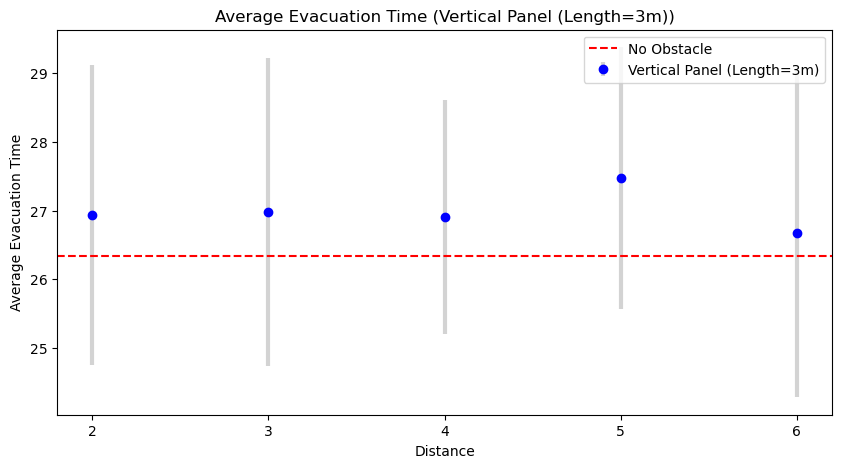

In [10]:
# length=3m
time_list_d = []
for d in range(2,7):
    print(f"No.{d-1} Simulation(d={d})")
    time_list = []
    time_perct_list = []
    for seed in range(20):
        barrier_set = barrier_set_noobs + [(26-d-3,8),(26-d,9)]
        time, time_perct = one_simulation(barrier_set, percent_threshold, 
                    r_1, r_2, r_3, A_p, A_o, B, beta1, beta2,
                    N, delta_time, seed, gui_display=False)
        time_list.append(time)
    time_list_d.append(time_list)

plot_with_ci(time_list_d,range(2,7), obstacle_type='Vertical Panel (Length=3m)', value_noobs=np.mean(time_list_noobs))

### 1.4 One Pillar

No.1 Simulation(d=2)
No.2 Simulation(d=3)
No.3 Simulation(d=4)
No.4 Simulation(d=5)
No.5 Simulation(d=6)


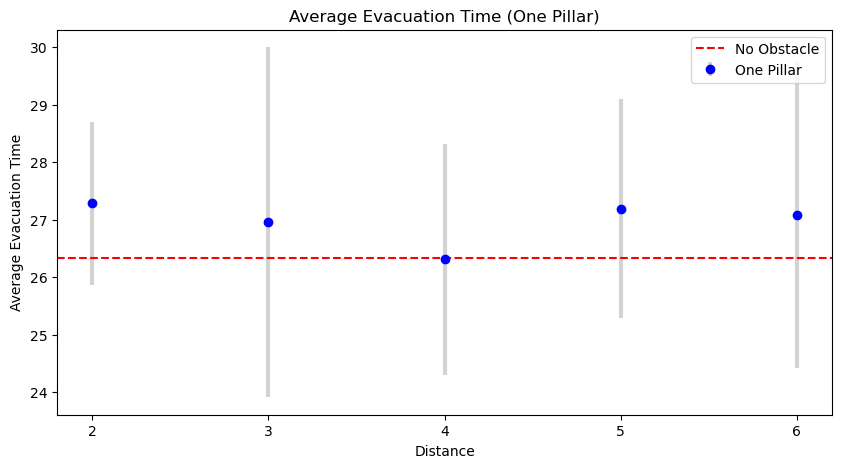

In [11]:
time_list_d = []
for d in range(2,7):
    print(f"No.{d-1} Simulation(d={d})")
    time_list = []
    time_perct_list = []
    for seed in range(20):
        barrier_set = barrier_set_noobs + [(26-d-1,8),(26-d,9)]
        time, time_perct = one_simulation(barrier_set, percent_threshold, 
                    r_1, r_2, r_3, A_p, A_o, B, beta1, beta2,
                    N, delta_time, seed, gui_display=False)
        time_list.append(time)
    time_list_d.append(time_list)

plot_with_ci(time_list_d,range(2,7), obstacle_type='One Pillar', value_noobs=np.mean(time_list_noobs))

## 2. Impact of Group-Split 

In [13]:
group_split = [(0.3, 0.1, 0.6), (0.1, 0.3, 0.6), (0, 0, 1)]
A_p=998.97
A_o=998.97
B=-0.08
beta1=1
beta2=3

### 2.1 No Obstacle

In [14]:
time_list_g_noobs = []
time_perct_list_g_noobs = [] 
for (r_3, r_2, r_1) in group_split:
    time_list = []
    time_perct_list = []
    for seed in range(20):
        if (seed+1)%5==0:
            print(f"No.{seed+1} Simulation")
        time, time_perct = one_simulation(barrier_set_noobs, percent_threshold, 
                                          r_1, r_2, r_3, A_p, A_o, B, beta1, beta2,
                                          N, delta_time, seed, gui_display=False)
        time_list.append(time)
        time_perct_list.append(time_perct)
    time_list_g_noobs.append(time_list)
    time_perct_list_g_noobs.append(time_perct_list)

No.5 Simulation
No.5 Simulation
No.5 Simulation


### 2.2 Optimal Obstacle

In [15]:
d = 5
optimal_obs = barrier_set_noobs + [(26-d-4, 8), (26-d, 9)]

time_list_g_obs = []
time_perct_list_g_obs = [] 
for (r_3, r_2, r_1) in group_split:
    time_list = []
    time_perct_list = []
    print(f"r3={r_3}, r2={r_2}, r1={r_1}:")
    for seed in range(20):
        if (seed+1)%5==0:
            print(f"No.{seed+1} Simulation")
        time, time_perct = one_simulation(optimal_obs, percent_threshold, 
                                          r_1, r_2, r_3, A_p, A_o, B, beta1, beta2,
                                          N, delta_time, seed, gui_display=False)
        time_list.append(time)
        time_perct_list.append(time_perct)
    time_list_g_obs.append(time_list)
    time_perct_list_g_obs.append(time_perct_list)

r3=0.3, r2=0.1, r1=0.6:
No.5 Simulation
r3=0.1, r2=0.3, r1=0.6:
No.5 Simulation
r3=0, r2=0, r1=1:
No.5 Simulation


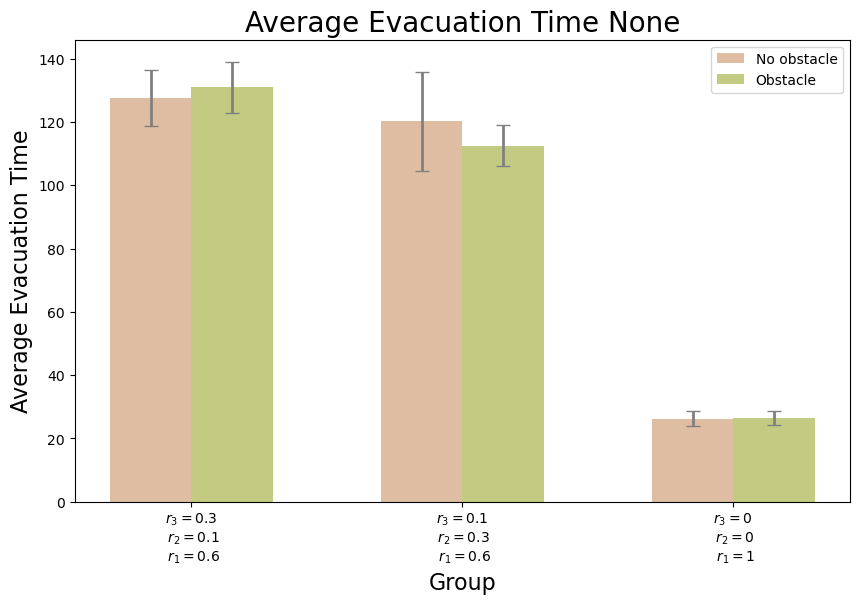

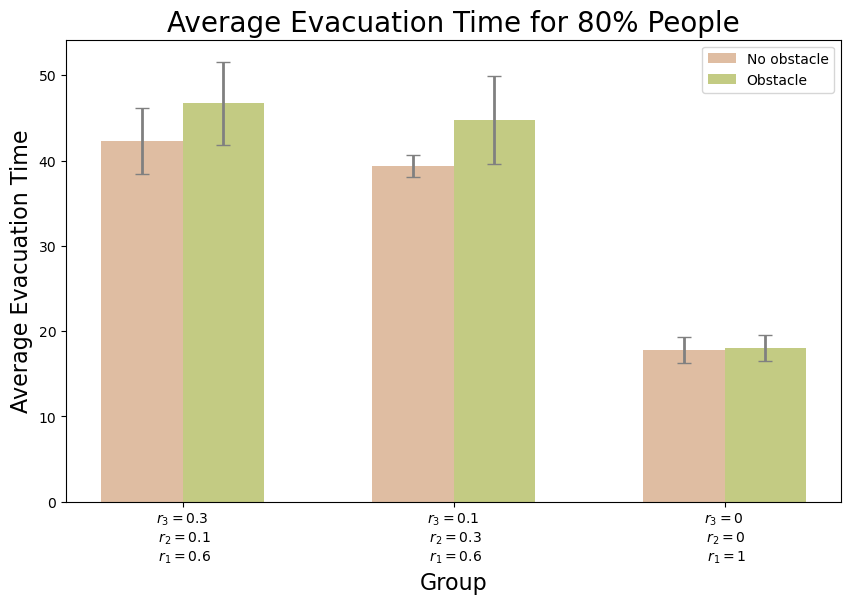

In [16]:
x_axis = ["$r_3=0.3$ \n $r_2=0.1$ \n $r_1=0.6$", 
                 "$r_3=0.1$ \n $r_2=0.3$ \n $r_1=0.6$", 
                 "$r_3=0$ \n $r_2=0$ \n $r_1=1$"]
plot_with_two_ci_bar(time_list_g_noobs, time_list_g_obs, x_axis, scenario=None)
plot_with_two_ci_bar(time_perct_list_g_noobs, time_perct_list_g_obs, x_axis, scenario='for 80% People')

### 2.3 heatmaps

No.5 Simulation


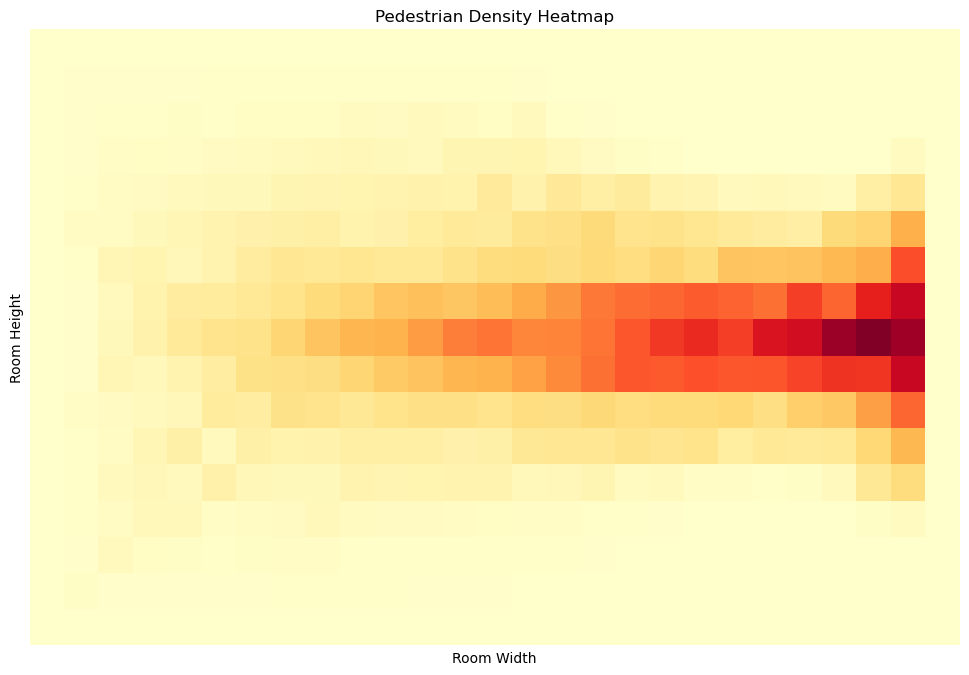

No.5 Simulation


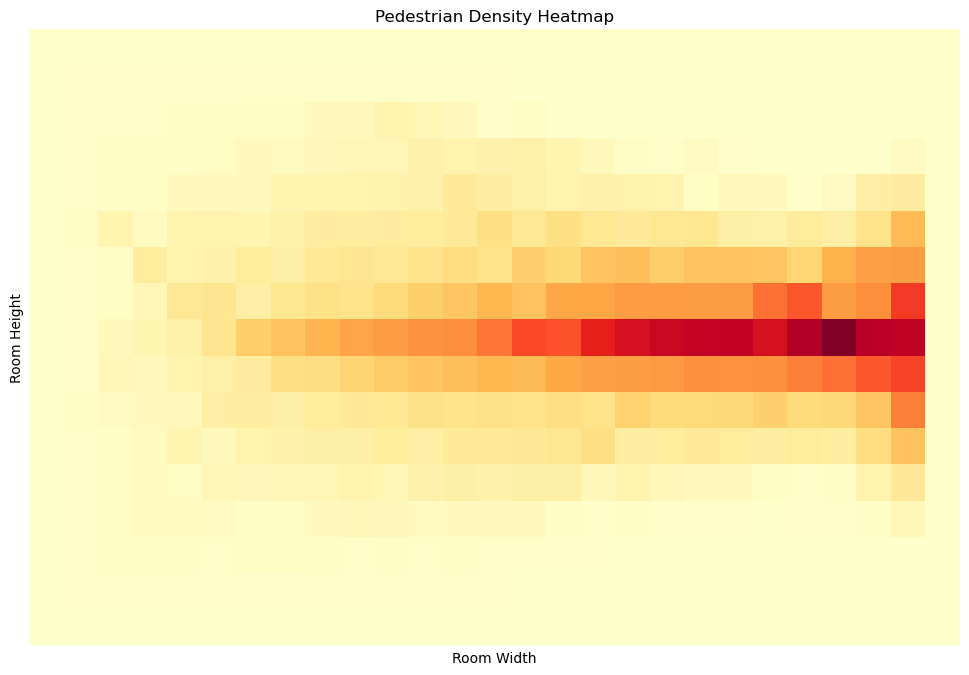

No.5 Simulation


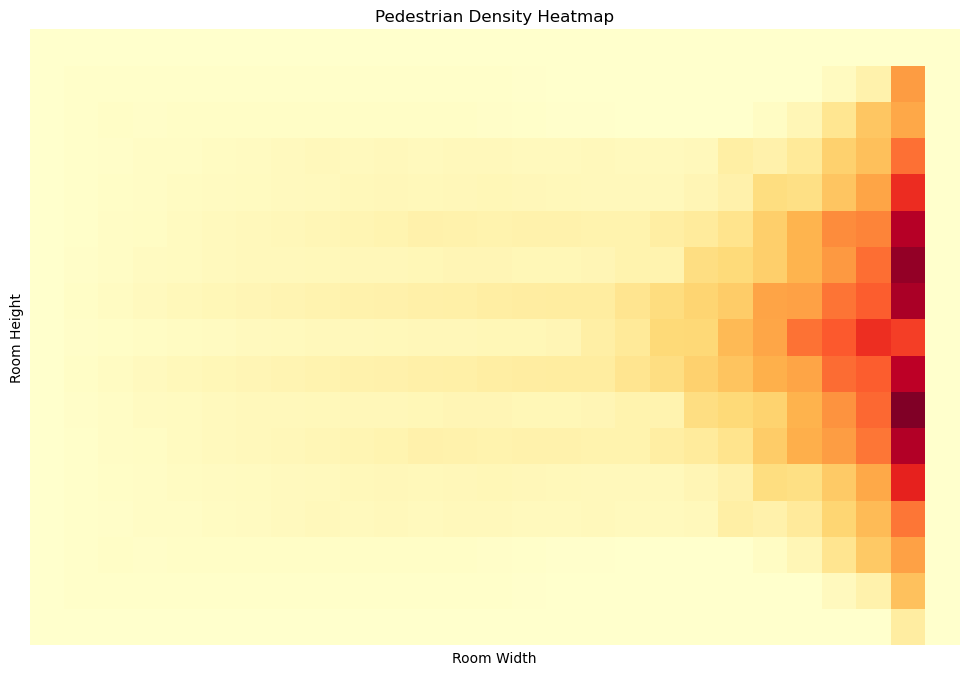

In [21]:
# no obstacles
for (r_3, r_2, r_1) in group_split:
    if (seed+1)%5==0:
        print(f"No.{seed+1} Simulation")
    time, time_perct, positions = one_simulation_for_heatmap(barrier_set_noobs, percent_threshold, 
                                        r_1, r_2, r_3, A_p, A_o, B, beta1, beta2,
                                        N, delta_time, seed, gui_display=False)
    # plot heatmap
    plot_heatmap(positions)

No.5 Simulation


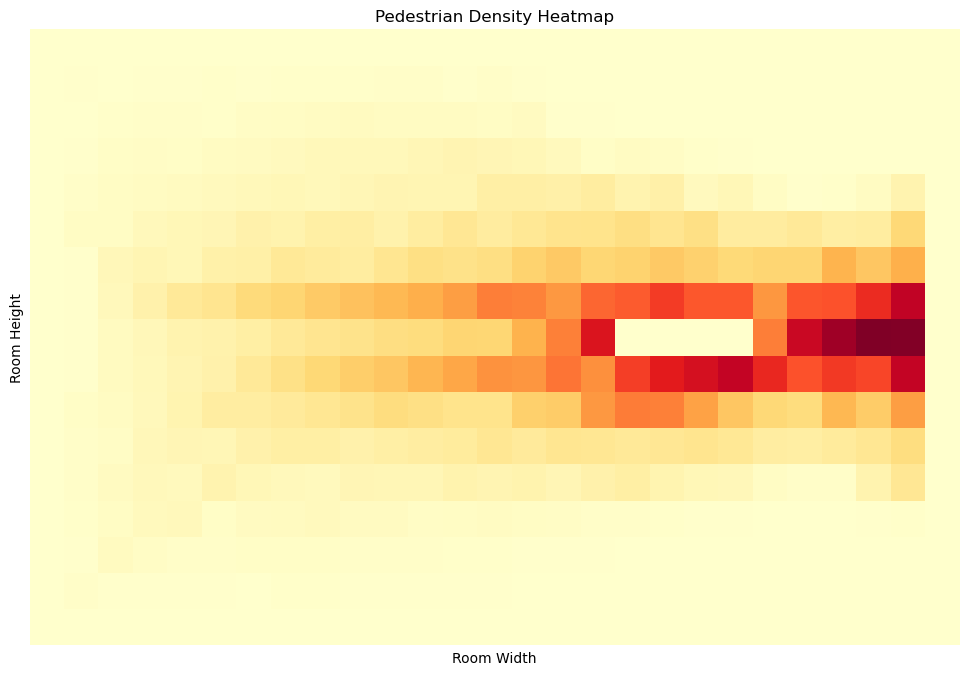

No.5 Simulation


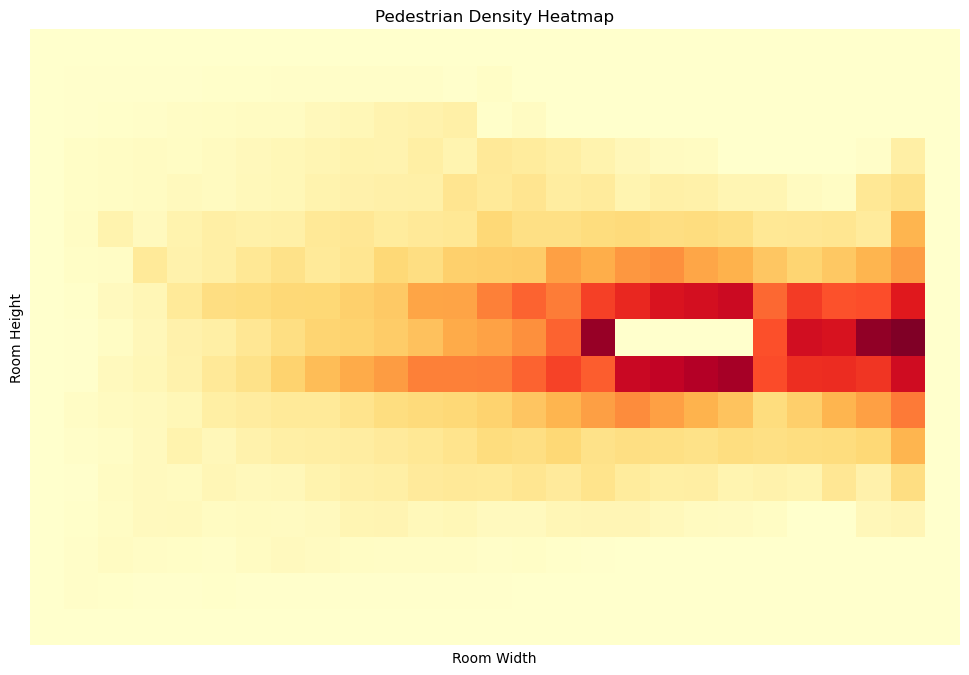

No.5 Simulation


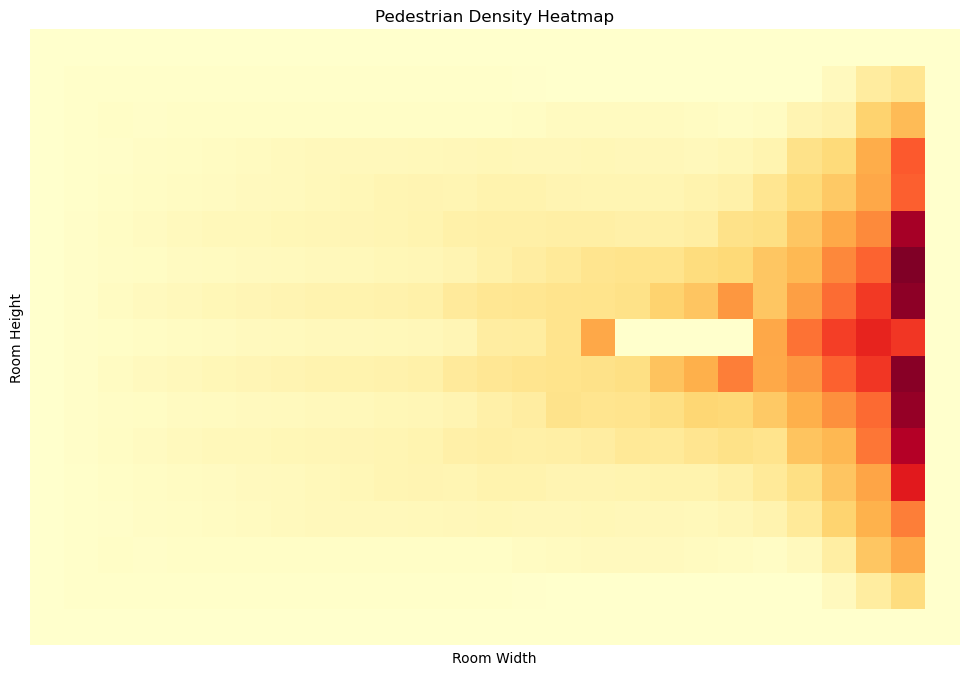

In [22]:
# obstacles
d = 5
optimal_obs = barrier_set_noobs + [(26-d-4, 8), (26-d, 9)]

time_list_g_yesobs = []
time_perct_list_g_yesobs = [] 
for (r_3, r_2, r_1) in group_split:
    if (seed+1)%5==0:
        print(f"No.{seed+1} Simulation")
    time, time_perct, positions = one_simulation_for_heatmap(optimal_obs, percent_threshold, 
                                        r_1, r_2, r_3, A_p, A_o, B, beta1, beta2,
                                        N, delta_time, seed, gui_display=False)
    plot_heatmap(positions)